<a href="https://colab.research.google.com/github/sc-dataman/DL_NNets/blob/master/TF_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 Classification using Tensor Flow and hyper-parameter tuning

Code customized 
Originally develped by Umberto 

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from keras.optimizers import adam
from keras.callbacks import Callback

from keras.utils import np_utils # To transform labels in categorical
from keras.datasets import cifar10 # To load the dataset

from keras.constraints import maxnorm

import numpy as np
import matplotlib.pyplot as plt


from keras import backend as K
K.set_image_dim_ordering('tf') # To tell TensorFlow the right order of dims

# if using google colab and wants to upload or download files
from google.colab import files

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

nClasses = 10
y_train = np_utils.to_categorical(y_train,nClasses)
y_test = np_utils.to_categorical(y_test,nClasses)

# Normalizing pixel values to [0-1] range


# Point 1: Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train_vec = np.reshape(x_train,(50000,3072))
X_test_vec = np.reshape(x_test,(10000,3072))


X_train = X_train_vec.astype('float32')
X_test = X_test_vec.astype('float32')

y_train.shape

Using TensorFlow backend.


(50000, 10)

In [0]:

X_train.shape

train = X_train.transpose()
labels_ = y_train.transpose()
 
test = X_test.transpose()
labels_test_ = y_test.transpose()
  
print(labels_.shape)
print(train.shape)

print(labels_test_.shape)
print(test.shape)



(10, 50000)
(3072, 50000)
(10, 10000)
(3072, 10000)


In [0]:
train = np.array(train)
test = np.array(test)
labels_ = np.array(labels_)
labels_test_ = np.array(labels_test_)

# 1 layer with softmax

In [0]:
def build_model_layers(number_neurons):
    n_dim = 3072
    tf.reset_default_graph()

    
    
    # Number of neurons in the layers
    n1 = number_neurons # Number of neurons in layer 1
    n2 = number_neurons # Number of neurons in layer 2 
    n3 = number_neurons
    n4 = number_neurons
    n5 = number_neurons
    n6 = 10
    #n5 = 10 # Neurons for the softmax function

    cost_history = np.empty(shape=[0], dtype = float)
    learning_rate = tf.placeholder(tf.float32, shape=())

    stddev_f = 0.1

    tf.set_random_seed(5)

    X = tf.placeholder(tf.float32, [n_dim, None])
    Y = tf.placeholder(tf.float32, [10, None])
    W1 = tf.Variable(tf.random_normal([n1, n_dim], stddev=stddev_f)) 
    b1 = tf.Variable(tf.constant(0.0, shape = [n1,1]) )
    W2 = tf.Variable(tf.random_normal([n2, n1], stddev=stddev_f)) 
    b2 = tf.Variable(tf.constant(0.0, shape = [n2,1])) 
    W3 = tf.Variable(tf.random_normal([n3,n2], stddev = stddev_f))
    b3 = tf.Variable(tf.constant(0.0, shape = [n3,1]))
    W4 = tf.Variable(tf.random_normal([n4,n3], stddev = stddev_f))
    b4 = tf.Variable(tf.constant(0.0, shape = [n4,1]))
    
    W5 = tf.Variable(tf.random_normal([n5,n4], stddev = stddev_f))
    b5 = tf.Variable(tf.constant(0.0, shape = [n5,1]))
    
    W6 = tf.Variable(tf.random_normal([n6,n5], stddev = stddev_f))
    b6 = tf.Variable(tf.constant(0.0, shape = [n6,1]))
    
  

    # Let's build our network...
    Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) 
    Z2 = tf.nn.relu(tf.matmul(W2, Z1) + b2) 
    Z3 = tf.nn.relu(tf.matmul(W3, Z2) + b3)
    Z4 = tf.nn.relu(tf.matmul(W4, Z3) + b4)
    Z5 = tf.nn.relu(tf.matmul(W5, Z4) + b5)
    Z6 = tf.matmul(W6, Z5) + b6
  
    y_ = tf.nn.softmax(Z6,0) 


    cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    
    return optimizer, cost, y_, X, Y, learning_rate

In [0]:
def build_model(number_neurons):
    n_dim = 3072
    tf.reset_default_graph()

    # Number of neurons in the layers
    n1 = number_neurons# Number of neurons in layer 1
    n2 = number_neurons# Number of neurons in layer 2
    n3 = number_neurons# Number of neurons in layer 3
    n4 = number_neurons# Number of neurons in layer 4
    n5 = number_neurons# Number of neurons in layer 5
    n6 = 10 # Number of neurons in output layer 

    cost_history = np.empty(shape=[1], dtype = float)
    learning_rate = tf.placeholder(tf.float32, shape=())

    X = tf.placeholder(tf.float32, [n_dim, None])
    Y = tf.placeholder(tf.float32, [10, None])
    W1 = tf.Variable(tf.truncated_normal([n1, n_dim], stddev=.1)) 
    b1 = tf.Variable(tf.constant(0.1, shape = [n1,1]) )
    
    W2 = tf.Variable(tf.truncated_normal([n2, n1], stddev=.1)) 
    b2 = tf.Variable(tf.constant(0.1, shape = [n2,1])) 
    
    W3 = tf.Variable(tf.truncated_normal([n3, n2], stddev=.1)) 
    b3 = tf.Variable(tf.constant(0.1, shape = [n3,1])) 
    
    W4 = tf.Variable(tf.truncated_normal([n4, n3], stddev=.1)) 
    b4 = tf.Variable(tf.constant(0.1, shape = [n4,1])) 
    
    W5 = tf.Variable(tf.truncated_normal([n5, n4], stddev=.1)) 
    b5 = tf.Variable(tf.constant(0.1, shape = [n5,1])) 
    
    W6 = tf.Variable(tf.truncated_normal([n6, n5], stddev=.1)) 
    b6 = tf.Variable(tf.constant(0.1, shape = [n6,1])) 

    # Let's build our network...
    Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) 
    Z2 = tf.matmul(W2, Z1) + b2 
    Z3 = tf.matmul(W3, Z2) + b3
    Z4 = tf.matmul(W4, Z3) + b4
    Z5 = tf.matmul(W5, Z4) + b5
    Z6 = tf.matmul(W6, Z5) + b6
    
    y_ = tf.nn.softmax(Z6,0) 

    cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    
    return optimizer, cost, y_, X, Y, learning_rate

In [0]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step = 100, 
                 learning_r = 0.001, number_neurons = 15, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

           
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [0]:
def model(minibatch_size, training_epochs, features, classes, logging_step = 100, learning_r = 0.001, number_neurons = 15):
    
    opt, c, y_, X, Y, learning_rate = build_model(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

           
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if (epoch % logging_step == 0):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_, learning_rate: learning_r}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_, learning_rate: learning_r}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

In [0]:
%%time
acc_train, acc_test, sess, cost_history = model(minibatch_size = 50, 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 10,
                              learning_r = 0.001,
                              number_neurons = 30)

print(acc_train)
print(acc_test)

Reached epoch 0 cost J = 0.32590237
Reached epoch 10 cost J = 0.32314393
Reached epoch 20 cost J = 0.31939507
Reached epoch 30 cost J = 0.31197596
Reached epoch 40 cost J = 0.3028467
Reached epoch 50 cost J = 0.2962523
0.25098
0.2571
CPU times: user 5min 53s, sys: 21.7 s, total: 6min 15s
Wall time: 4min 49s


# Exercise 1

Using grid search find the optimal number of neurons in the layer that gives you the best accuracy. With optimal is meant big enough but not too big. After a certain number, increasing the number will not help anymore. Try to finda  good balance between number of neurons and time required for training training.

You can use a code similar to the following.

In [0]:
nn = [30,64,128,256]
for nn_ in nn:
    acc_train, acc_test, sess, cost_history = model(minibatch_size = 256, 
                              training_epochs = 100, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = 0.001,
                              number_neurons = nn_)
    print('Number:',nn_,'Acc. Train:', acc_train, 'Acc. Test', acc_test)

NameError: ignored

In [0]:
def get_random_element_with_label (data, lbls, lbl):
    subset = data[lbls == lbl]
    return np.random.choice(subset)

# Exercise 2 - Find the best learning rate and number of neurons with random and logarithmic search

Do hyperparameter tuning for

- Learning rate
- Number of neurons

using random search and for the learning rate logarithimc search. 

You can use the following code as example.

- Try the code with a different number of randomly selected values.

In [0]:
neurons_ = np.random.randint(low=35, high=60.0, size=(10))

r = -np.random.random([10])*4.0

learning_ = 10**r

In [0]:
learning_

array([1.17655096e-04, 5.86204655e-02, 1.04542655e-02, 2.23468096e-04,
       6.66085557e-01, 1.90703727e-01, 9.20111902e-03, 4.61827071e-01,
       5.22271634e-02, 7.82464921e-03])

In [0]:
for i in range(len(neurons_)):
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = 50, 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = learning_[i],
                              number_neurons = neurons_[i], debug = False)
    print('Number:',neurons_[i],'learning', learning_[i], 'Acc. Train:', acc_train, 'Acc. Test', acc_test)

# Exercise 3 - Optimise learning rate, number of neurons and mini-batch size (with random search)

Do hyperparameter tuning for

- Learning rate
- Number of neurons
- mini-batch size

using random search and for the learning rate logarithimc search. 

You can use the following code as example.

- Try the code with a different number of randomly selected values.

In [0]:
neurons_ = np.random.randint(low=35, high=60.0, size=(5))

r = -np.random.random([10])*4.0

learning_ = 10**r

mb_size_ = np.random.randint(low=20, high=80, size = 5)

In [0]:
mb_size_

array([66, 40, 70, 71, 51])

In [0]:
for i in range(len(neurons_)):
    #print('Number:',neurons_[i],'learning', learning_[i])
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = mb_size_[i], 
                              training_epochs = 50, 
                              features = train, 
                              classes = labels_, 
                              logging_step = 50,
                              learning_r = learning_[i],
                              number_neurons = neurons_[i], debug = False)
    print('Number:',neurons_[i],'learning', learning_[i], 'mb size',mb_size_[i],
          'Acc. Train:', acc_train, 'Acc. Test', acc_test)

# Let's test it with Adam optimizer

In [0]:
def build_model_layers(number_neurons):
    n_dim = 784
    tf.reset_default_graph()

    
    
    # Number of neurons in the layers
    n1 = number_neurons # Number of neurons in layer 1
    n2 = number_neurons # Number of neurons in layer 2 
    n3 = number_neurons
    n4 = 10

    cost_history = np.empty(shape=[0], dtype = float)
    learning_rate = tf.placeholder(tf.float32, shape=())

    stddev_f = 0.1

    tf.set_random_seed(5)

    X = tf.placeholder(tf.float32, [n_dim, None])
    Y = tf.placeholder(tf.float32, [10, None])
    W1 = tf.Variable(tf.random_normal([n1, n_dim], stddev=stddev_f)) 
    b1 = tf.Variable(tf.constant(0.0, shape = [n1,1]) )
    W2 = tf.Variable(tf.random_normal([n2, n1], stddev=stddev_f)) 
    b2 = tf.Variable(tf.constant(0.0, shape = [n2,1])) 
    W3 = tf.Variable(tf.random_normal([n3,n2], stddev = stddev_f))
    b3 = tf.Variable(tf.constant(0.0, shape = [n3,1]))
    W4 = tf.Variable(tf.random_normal([n4,n3], stddev = stddev_f))
    b4 = tf.Variable(tf.constant(0.0, shape = [n4,1]))
    #W5 = tf.Variable(tf.truncated_normal([n5,n4], stddev = stddev_f))
    #b5 = tf.Variable(tf.constant(stddev_f, shape = [n5,1]))

    # Let's build our network...
    Z1 = tf.nn.relu(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
    Z2 = tf.nn.relu(tf.matmul(W2, Z1) + b2) # n2 x n1 * n1 * n_obs = n2 x n_obs
    Z3 = tf.nn.relu(tf.matmul(W3, Z2) + b3)
    Z4 = tf.matmul(W4, Z3) + b4
    #Z4 = tf.nn.relu(tf.matmul(W4, Z3) + b4)
    #Z5 = tf.matmul(W5,Z4) + b5
    y_ = tf.nn.softmax(Z4,0) # n2 x n_obs (10 x None)


    cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
    optimizer = optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate, 
                                                   beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8).minimize(cost)

    init = tf.global_variables_initializer()
    
    return optimizer, cost, y_, X, Y, learning_rate

In [0]:
def model_layers(minibatch_size, training_epochs, features, classes, logging_step = 100, 
                 learning_r = 0.001, number_neurons = 15, debug = False):
    
    opt, c, y_, X, Y, learning_rate = build_model_layers(number_neurons)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    cost_history = []
    for epoch in range(training_epochs+1):
        for i in range(0, features.shape[1], minibatch_size):
            X_train_mini = features[:,i:i + minibatch_size]
            y_train_mini = classes[:,i:i + minibatch_size]

            #if (i % 5000 == 0):
            #    print('i = ',i)
            
            sess.run(opt, feed_dict = {X: X_train_mini, Y: y_train_mini, learning_rate: learning_r})
        cost_ = sess.run(c, feed_dict={ X:features, Y: classes, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)

        if ((epoch % logging_step == 0) & debug):
                print("Reached epoch",epoch,"cost J =", cost_)
                
    correct_predictions = tf.equal(tf.argmax(y_,0), tf.argmax(Y,0))
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"))
    accuracy_train = accuracy.eval({X: train, Y: labels_, learning_rate: 0.001}, session = sess)
    accuracy_test = accuracy.eval({X: test, Y: labels_test_, learning_rate: 0.001}, session = sess)
                
    return accuracy_train, accuracy_test, sess, cost_history

# Complete hyperparameter tuning 

In [0]:
neurons_ = np.random.randint(low=35, high=60.0, size=(20))

r = -np.random.random([20])*(6-5)-5

learning_ = 10**r

mb_size_ = np.random.randint(low=20, high=80, size = 20)

epochs_ = np.random.randint(low = 40, high = 100, size = (20))

In [0]:
for i in range(len(neurons_)):
    #print('Number:',neurons_[i],'learning', learning_[i])
    acc_train, acc_test, sess, cost_history = model_layers(minibatch_size = mb_size_[i], 
                              training_epochs = epochs_[i], 
                              features = train, 
                              classes = labels_, 
                              logging_step = 10,
                              learning_r = learning_[i],
                              number_neurons = neurons_[i], debug = False)
    print('epochs:', epochs_[i], 'Number:',neurons_[i],'learning', learning_[i], 'mb size',mb_size_[i],
          'Acc. Train:', acc_train, 'Acc. Test', acc_test)

epochs: 65 Number: 46 learning 3.75743361986e-06 mb size 20 Acc. Train: 0.838683 Acc. Test 0.8407
epochs: 54 Number: 37 learning 7.12390609733e-06 mb size 56 Acc. Train: 0.8246 Acc. Test 0.8241
epochs: 42 Number: 37 learning 2.14766290607e-06 mb size 45 Acc. Train: 0.712933 Acc. Test 0.7131
epochs: 70 Number: 39 learning 5.59340704666e-06 mb size 76 Acc. Train: 0.814483 Acc. Test 0.8107
epochs: 83 Number: 50 learning 8.14470677233e-06 mb size 32 Acc. Train: 0.1 Acc. Test 0.1
epochs: 60 Number: 44 learning 3.97668096387e-06 mb size 58 Acc. Train: 0.8123 Acc. Test 0.815
epochs: 52 Number: 35 learning 2.11130468914e-06 mb size 78 Acc. Train: 0.691283 Acc. Test 0.6906
epochs: 70 Number: 43 learning 4.94147290757e-06 mb size 32 Acc. Train: 0.837283 Acc. Test 0.8374
epochs: 70 Number: 44 learning 8.09986058619e-06 mb size 59 Acc. Train: 0.847767 Acc. Test 0.8477
epochs: 46 Number: 35 learning 3.28760183015e-06 mb size 37 Acc. Train: 0.779567 Acc. Test 0.777
epochs: 51 Number: 46 learning 3.1

In [1]:

import tensorflow as tf
import numpy as np                                
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import keras as k
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD, Adam
from keras.regularizers import l2
import h5py
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator




#load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
img_rows, img_cols , channels= 32,32,3
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()



# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    #zoom_range=0.3
    )
datagen.fit(x_train)


#reshape into images
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)
input_shape = (img_rows, img_cols, 1)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



#convert integers to float; normalise and center the mean
x_train=x_train.astype("float32")  
x_test=x_test.astype("float32")
mean=np.mean(x_train)
std=np.std(x_train)
x_test=(x_test-mean)/std
x_train=(x_train-mean)/std


# labels
num_classes=10
y_train = k.utils.to_categorical(y_train, num_classes)
y_test = k.utils.to_categorical(y_test, num_classes)


#reg=l2(1e-4)   # L2 or "ridge" regularisation
reg2=None
num_filters2=32
ac2='relu'
adm2=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt2=adm2
drop_dense2=0.5
drop_conv2=0

model2 = Sequential()

model2.add(Conv2D(num_filters2, (3, 3), activation=ac2, kernel_regularizer=reg2, input_shape=(img_rows, img_cols, channels),padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model2.add(Dropout(drop_conv2))

model2.add(Flatten())
model2.add(Dense(512, activation=ac2,kernel_regularizer=reg2))
model2.add(BatchNormalization())
model2.add(Dropout(drop_dense2))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt2)


history2=model2.fit_generator(datagen.flow(x_train, y_train, batch_size=256),
                     epochs=5, steps_per_epoch = len(x_train) / 128 , validation_data=(x_test, y_test)) 

Using TensorFlow backend.


Exception: ignored

In [4]:
# Saving this model 

model2.save('cifar10_cnn80.h5') 


NameError: ignored

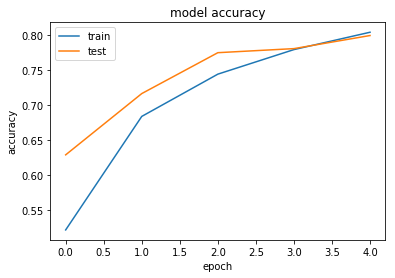

10000/10000 [==============================] - 1s 77us/step


[0.5868985686302185, 0.7997]

In [10]:
import matplotlib.pyplot as plt

def plothist(hist):
    plt.plot(hist.history['acc'])
    plt.plot(hist.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

plothist(history2)

model2_test_acc=model2.evaluate(x_test,y_test,batch_size=128)
model2_test_acc


In [9]:

model2_train_acc=model2.evaluate(x_train,y_train,batch_size=128)
model2_train_acc

50000/50000 [==============================] - 4s 74us/step


[0.4888008660125732, 0.82896]

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

Y_pred = model2.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)


df_cm = pd.DataFrame(cm, range(10), range(10))
print(df_cm)

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[832  17  75   1  11   0   9  18  20  17]
 [  9 950   2   0   2   1   8   1   8  19]
 [ 28   4 836   7  29  17  64  14   1   0]
 [ 31   5 159 462  46  97 132  40  10  18]
 [  7   0 115  11 732  14  83  34   3   1]
 [  6   5  89  67  33 694  55  48   3   0]
 [  4   0  39   4   7   4 932   6   3   1]
 [ 10   0  35   5  30  23  12 881   0   4]
 [ 61  34  21   3   1   0  17   2 843  18]
 [ 25  99   8   2   3   0   8  11   9 835]]
     0    1    2    3    4    5    6    7    8    9
0  832   17   75    1   11    0    9   18   20   17
1    9  950    2    0    2    1    8    1    8   19
2   28    4  836    7   29   17   64   14    1    0
3   31    5  159  462   46   97  132   40   10   18
4    7    0  115   11  732   14   83   34    3    1
5    6    5   89   67   33  694   55   48    3    0
6    4    0   39    4    7    4  932    6    3    1
7   10    0   35    5   30   23   12  881    0    4
8   61   34   21    3    1    0

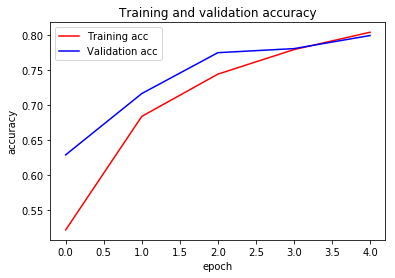

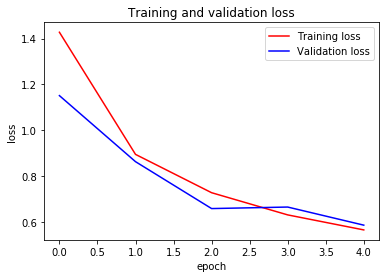

In [24]:
#Graphing our training and validation
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()


f.savefig( "test2.png")


cifar10_cnn80.h5  sample_data  test1.png  test2.png  test3.png


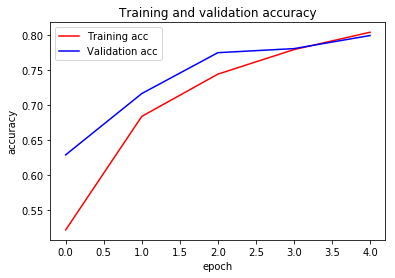

In [23]:
!ls
f.savefig( "test3.png")

from google.colab import files
files.download( "test3.png" )  

In [32]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout,BatchNormalization, Flatten


from keras.callbacks import Callback
import h5py
from keras.models import load_model



from keras import backend as K
K.set_image_dim_ordering('tf') # To tell TensorFlow the right order of dims

# if using google colab and wants to upload or download files
from google.colab import files

# Recreate the exact same model, including weights and optimizer.
new_model = keras.models.load_model('cifar10_cnn80.h5')
new_model.summary()

y_pred_test = new_model.predict_proba(x_test)
y_pred_test

loss, acc = new_model.evaluate(x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)       

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


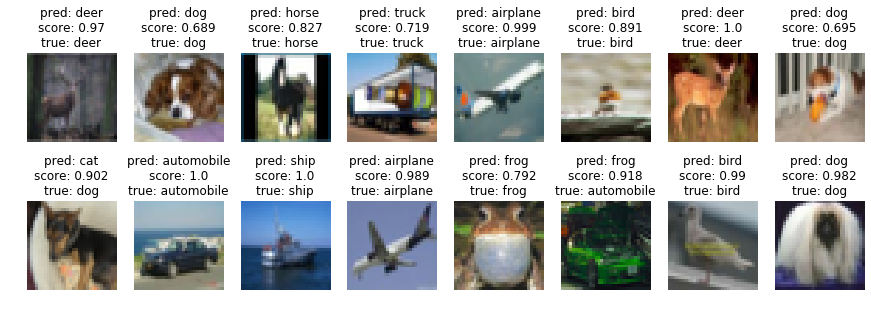

In [36]:
(x_trainn, y_trainn), (x_testt, y_test) = cifar10.load_data()

NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

y_pred_test = new_model.predict_proba(x_test)
y_pred_test
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

y_pred_test_max_probas


cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_testt[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls "/content/gdrive/My Drive/Track" 



test_path = '/content/gdrive/My Drive/Track/sample_image.png'


from google.colab import files
from IPython.display import Image

uploaded = files.upload()


# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
  # reshape into a single sample with 3 channels
	img = img.reshape(1, 3072)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('sample_image.png')
  # load model
	model = load_model('cifar10_cnn80.h5')
	# predict the class
	result = model.predict_classes(img)
	print(result[0])
 
# entry point, run the example
run_example()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
sample_image.png


Saving sample_image.png to sample_image.png


OSError: ignored